In [3]:
from data.data_loading import load_data
from data.data_loading import plot_train_test
from data.data_transforms import data_transform_std
from data.data_splitting import train_test_split
import numpy as np
from utils.metrics import mse, mae, smape
from typing import List
from typing import Union
from utils.getmetrics import getmetrics

def RandomWalk(file_name: str, training_ratio: float, horizon: int, main_output: str, normalization: bool) -> None:
    data = load_data(file_name, main_output = main_output)
    train_size = int(training_ratio*len(data))
    if normalization:
        scaled_mean_std, data = data_transform_std(data, train_size)

    train_data, val_data, test_data = train_test_split(data)    # No validation data for Random Walk.   
    train_data_MO = train_data[[main_output]]                   # Train set for main output column.
    test_data_MO = test_data[[main_output]]                     # Test set for main output column.
    actual = data[[main_output]]                                # Actual complete dataset for main output.
    forecasts = []
    for i in range(len(test_data_MO) - horizon):
        forecasts.append(actual.iloc[train_size + i - 1,:])     # For Random Walk, start with last value from tarining set.

    actual = actual[train_size + horizon:]                      # Aligning actual with forecasts so both have same length.
    actual = np.array(actual)                                   # Convert actual a numpy array

    plot_train_test(data, main_output, train_size, train_data_MO, test_data_MO, forecasts)
    mse, mae, smape = getmetrics(actual, forecasts)
    
    print("Test set metrics {}".format(main_output))
    print('N:{}, MSE:{}, MAE:{}, sMAPE:{}'.format(len(actual), mse, mae, smape))
    return

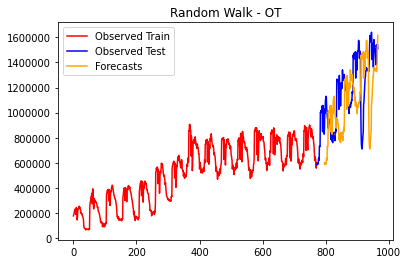

Test set metrics OT
N:170, MSE:121770394465.28824, MAE:289472.9117647059, sMAPE:26.114521944064595


In [4]:
RandomWalk(file_name = 'datasets/illness/national_illness.csv', training_ratio = 0.8, horizon = 24, main_output = 'OT',
    normalization = False)